<a href="https://colab.research.google.com/github/tiasondjaja/plugplaydslessons/blob/master/lessons-python-colab/lesson05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5: Classification

Key Ideas:
1. Finding patterns and making predictions about categorical variables
    + Overview of the iterative modeling process
    + Splitting the dataset into a training set and a validation/testing set
    + Finding patterns in the data, using the training set
2. Creating simple decision tree classifiers based on patterns observed in data
3. Assessing, comparing, and improving models
    + Assessing the performance of the model on the training dataset
    + Assessing the performance of the model on the test dataset
    + Metrics for model assessment
    + k-Nearest Neighbor (kNN) Classifiers

## 1. Finding patterns and making predictions about categorical variables

### A quick recap of the mathematical modeling process

Recall the math modeling process:
+ Step 1: Find patterns in data
+ Step 2: Build a model that fits the data relatively well  (e.g., fit a line through the plotted data points)
+ Step 3: Assess the model
+ Step 4: Repeat, until we have a model that represents the real world process sufficiently well
+ Step 5: Use the model to make predictions/decisions

In Lesson 3, (1) we found a pattern in the `geyser` data by visualizing the data points in a scatterplot.  (2) From the visualization, and by computing the correlation coefficient between the variables `duration` and `waiting`, we determine that a line is a reasonable type of model.  We then find a line of best fit (one that minimizes MSE).  Assuming that this model is reasonable, we can use the model to predict when the next eruption will take place, given the duration of an eruption that just took place.

In the above example, the quantity that we want to predict is `waiting`, the number of minutes until the next eruption, which is a numerical variable. 

### Predicting a categorical variable

Next, we will see an example of models for predicting a categorical variable.  This type of task is called a **classification** task.  Here are some examples of classification tasks:
+ Classifying an email as spam or not spam
+ Given an image/photograph of an animal, determine the animal's species
+ Given an image of a handwritten letter, determine what letter it is
+ Given a song, determine its genre
+ Given an activity on a website, determine if it is human or a bot
+ etc.

A binary classification task is one that involves only two possible categories (for example, human vs. bot, or spam vs. not spam).  To keep things simpler, we will focus our attention only on binary classification tasks.


***Example***

The dataset below consists of information on 699 tumor samples.  The `id` column contains an identifier for each observed tumor.  The `class` column takes on two values: 2 (indicating that the tumor is benign) and 4 (indicating that the tumor is malignant).  In addition to the `id` and `class` columns, there are nine variables that describe various aspects of each sample.  These variables are discrete numerical variables, and could be thought of as either numerical or categorical.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
cancerdata = pd.read_csv('../../datasets/cancerdata.csv')
cancerdata

,id,clump_thickness,uniformity_cellsize,uniformity_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Using the above dataset, our goal is to create a model that allows us to predict whether a tumor sample is benign or malignant (that is, whether `class` is 2 or 4), based the values of the nine predictor variables (`clump_thickness`, `uniformity_cellsize`, etc.).

Such a model will have to capture a pattern that relates the values of the nine predictor variable to the value of the `class`.  To make sure that we create a model that could be generalized to other tumor data as well (that are not part of this dataset), we need to make sure that the model that we create does not 'overfit' to this particular dataset.

For this reason, before we start digging into this dataset to try to find any pattern, we need to first split the dataset into training and test sets.  Each set will contains the same number of columns, but we will randomly assign the 699 rows into the training and the test sets. 
+ We will use the **training set** to find patterns in the data, to build, and to tune our model.
+ We will use the **test set** to assess how well our model generalize to data that it has never "seen" before (i.e., to data that were not used to inform how the model was built).


### Splitting the dataset into training and test sets

There is no one hard rule for how we must split our dataset into training and test sets.  For example, taking 70% of all observations for the training data and the remaining 30% for the test data is acceptable for this example.

One of the easiest ways to split a given dataset into training and test sets is to use a tool from the sklearn library.  To do this,
+ First store the variable to be predicted into an array (let's call it `Y`), and store the predictor variables into a dataframe (let's call it `X`).
+ Import the `train_test_split` function from `sklearn.model_selection`
+ Use the `train_test_split` function:
    + The first two inputs are `X` and `Y` as specified above
    + The third input is `test_size`, which specifies the proportion of all observations that should be assigned to the test set; this can be any number between 0 and 1.
    + The fourth input is `random_state`, which can take any nonnegative integer value.  The purpose of this argument is to control the pseudorandom shuffling that is applied to the dataset before it is split.  This makes sure that no matter how many times we run the command, the resulting training and test sets would remain the same instead of changing each time.
```
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
```
+ The outputs of the `train_test_split` function are:
    + The first output contains the variables in `X` but only 70% of the observations; this will be the predictor variables in our training set (call it `X_train`)
    + The second output contains the variables in `X` but only the remaining 30% of the observations; this will be the predictor variables in our test set (call it `X_test`) 
    + The third output contains just the `class` values of the observations in the training dataset (call it `y_train`)
    + The fourth output contains just the `class` values of the observations in the test dataset (call it `y_test`) 



In [ ]:
from sklearn.model_selection import train_test_split

X = cancerdata.iloc[ : , 1:10 ]  # we take just the nine predictor variables; all 699 rows
Y = cancerdata['class'] # just the class values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
# check
X_train.shape  # the training dataset has 489 observations

(489, 9)

In [ ]:
# check
X_test.shape # the test dataset has 210 observations

(210, 9)

Above, we see that we have 489 observations in the training dataset (about 70% of 699) and 210 observations in the test dataset (about 30% of 699).

### Finding Patterns in Data

We are now ready to investigate **the training dataset** to see patterns in the data, using data exploration tools that we learned in lessons 1 and 2.  (We put aside the test dataset until later, once we have built a model, in order to evaluate how well this model performs against data that it hasn't observed during its construction.)  

For example, we can start by grouping the rows (the samples) based on whether the sample is benign or malignant (according to the 'class' column), then computing the average value of the nine variables, for each class.

Running the code cell below, we see that for a lot of the variables, the averages are smaller among the class-2 rows than the averages among the class-4 rows.  So, we see the pattern that the higher the variable values are, the more likely it is that the sample is that of a malignant tumor.

In [ ]:
cancerdata.groupby('class').agg( 'mean')

,id,clump_thickness,uniformity_cellsize,uniformity_cellshape,marginal_adhesion,epithelial_cellsize,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,
2,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,2.100437,1.290393,1.063319
4,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212


We could also create data visualizations.  We cannot create a scatterplot to visualize the relationships among all nine variables at once, but we can create a scatterplot for each pair of variables, and coloring each point based on whether the point corresponds to a benign or malignant sample.

The scatterplot below tells us that samples whose `clump_thickness` value is 6 or less and whose `uniformity_cellsize` value is 4 or less seem to be mostly benign (`class` = 2).  Points outside of this region seems to correspond mostly to malignant samples.

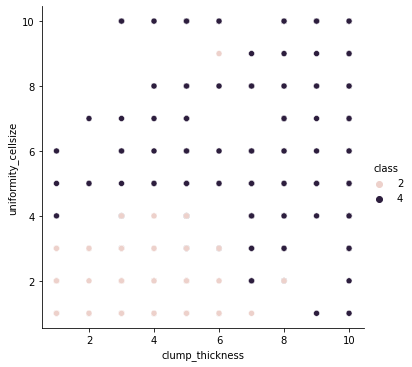

In [ ]:
sns.relplot( data = cancerdata , x = 'clump_thickness', y = 'uniformity_cellsize' , hue = 'class' )

***Exercise***

Create a similar scatterplot to visualize other pairs of predictor variables, choosing the hue of each point based on the value of the `class` variable.  Do you observe other useful patterns?

In [ ]:
# ...
# ...

## 2. Creating simple decision tree classifiers based on patterns observed in data

With just the above observations, we can create a simple classification model, based only on two variables: `the uniformity_cellsize` and `clump_thickness` values.

+ If `clump_thickness` is less than or equal to 6,
    + If `uniformity_cellsize` is less than or equal to 4, then predict `class` to be 2 (benign)
    + Otherwise (that is, `clump_thickness <= 6` but `uniformity_cellsize > 4`), then predict `class` to be 4 (malignant)
+ Otherwise (if `clump_thickness is > 6`, regardless of what `unifromity_cellsize` is), then predict `class` to be 4 (malignant)

We can implement this model as a nested if-else statement:

In [ ]:
clump_thickness = 7      # experiment and change this value
uniformity_cellsize = 2  # experiment and change this value


if clump_thickness <= 6 :
    if uniformity_cellsize <= 4:
        predicted_class = 2
    else:
        predicted_class = 4
else:
    predicted_class = 4

print(predicted_class)  # display the predited class

4


We can further define a function to make the above code more reusable.  Let's call this function `predict_cancer_class()`
+ whose first and second inputs are `clump_thickness` and `uniformity_cellsize` values, respectively.  
+ The action done by this function is the sequence of decision implemented by the above nested if-else statement.  
+ The output of the function is the predicted class.

In [ ]:
# define the function / the model
def predict_cancer_class( clump_thickness, predicted_class ):
    if clump_thickness <= 6 :
        if uniformity_cellsize <= 4:
            predicted_class = 2
        else:
            predicted_class = 4
    else:
        predicted_class = 4
        
    return( predicted_class )

In [ ]:
# check that the function works

sample_clump_thickness = 7      # experiment and change this value
sample_uniformity_cellsize = 2  # experiment and change this value

predict_cancer_class( sample_clump_thickness ,  sample_uniformity_cellsize )

4

In [ ]:
# check that the function works, example 2

sample_clump_thickness = 2      # experiment and change this value
sample_uniformity_cellsize = 3  # experiment and change this value

predicted_class_for_this_sample = predict_cancer_class( sample_clump_thickness ,  sample_uniformity_cellsize )

print( predicted_class_for_this_sample )

2


### Using the model on the training dataset

In the above two code cells, we experimented with using the model using arbitrary sample input values.  Next, we can try to make a prediction on each observation in the training dataset.

In the code cell below, we preview the first few rows of the training dataset.  The `clump_thickness` and `uniformity_cellsize` values of the first observation are 3 and 4, respectively.  Our model predicts that the value of `class` is 2 for this observation (benign).

We can check if this prediction is correct by viewing the first element of `y_train`, as we did below.  The actual value turns out to be 4, which means that our prediction for this observation was incorrect.

In [ ]:
display( X_train.head() )

# predict class of the first observation (row index 146)
predict_cancer_class(3, 4)

,clump_thickness,uniformity_cellsize,uniformity_cellshape,marginal_adhesion,epithelial_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
146,3,4,5,2,6,8,4,1,1
347,1,1,1,1,1,1,1,3,1
286,10,10,10,10,10,10,4,10,10
165,4,1,1,1,2,2,3,2,1
493,5,10,10,10,6,10,6,5,2


2

In [ ]:
# the actual class value of the first observation:
y_train.head()

146    4
347    2
286    4
165    2
493    4
Name: class, dtype: int64

In order to get a good sense of how well our model performs, it is not enough to test it on just one observation.  Let's test it on the remaining 488 observations in the training dataset.  

We could of course do this by hand, by manually reading and typing the values of `clump_thickness` and `uniformity_cellsize` one by one for each of these 488 observations, but this repetitive task would be tedious and time-consuming.  Instead, we will use a for loop to automate the process.

We want our for loop to look up the `clump_thickness` and `uniformity_cellsize` values for each row in `X_train`, then enter them as inputs to our `predict_cancer_class` function.  Therefore, the for loop will go through each item in the list of row indices in `X_train`, which we can obtain using `X_train.index`:

```
for index in X_train.index :
    predict_cancer_class( X_train['clump_thickness'][index] , X_train['uniformity_cellsize'][index] )
```
The above code is a good start, but we are not done.  Note that the predictions are currently not being stored anywhere!  Therefore, before we start the loop, we will first setup an "empty" array that contains just enough space to store the predicted values; let's call this array `y_train_predicted`.
```
y_train_predicted = np.zeros( y_train.shape ).astype(int)
y_train_predicted = pd.Series(y_train_predicted)
y_train_predicted.index = y_train.index
```
In the above code, 
+ We use the function `np.zeros` to create an array called `y_train_predicted` whose values are all zeros.  The array will have the same number of elements as `y_train`.  (We add `.astype(int)` because the value that we want to predict is 2 or 4, integers, so we set this placeholder to hold integer values as well.) This first line is the most important step; the next two lines are not conceptually important but makes things a bit easier technically.
+ Since `y_train` is not just an array but in fact something called a "pandas Series", we convert `y_train_predicted` into a pandas Series as well, using the `pd.Series` function.
+ Finally, we want to make the row indices of `y_train_predicted` consistent with the row indices of `X_train` and `y_train`.  We do this using: `y_train_predicted.index = y_train.index`


Finally, we can store the predictions of our model in the `y_train_predicted` by modifying the loop to be as follows.
```
for index in X_train.index :
    y_train_predicted[index] = predict_cancer_class( X_train['clump_thickness'][index] , X_train['uniformity_cellsize'][index] )
```



In [ ]:
y_train_predicted = np.zeros( y_train.shape ).astype(int)
y_train_predicted = pd.Series(y_train_predicted)
y_train_predicted.index = y_train.index

# make a prediction for the value of class, for each row in the training dataset.
for index in X_train.index :
    y_train_predicted[index] = predict_cancer_class( X_train['clump_thickness'][index] , X_train['uniformity_cellsize'][index] )

In [ ]:
# check
y_train_predicted

146    2
347    2
286    4
165    2
493    2
      ..
144    2
645    2
72     2
235    2
37     2
Length: 489, dtype: int32

## 3. Assessing, comparing, and improving models




### 3.1. Assessing the performance of the model on the training dataset

#### Counting the number of correct predictions
Above, we have stored our predictions in `y_train_predicted`.  We can compare this value to the actual class values in `y_train`.  One way to assess the quality of our model is simply to count how many of the predictions we get right.

We can use 
```
y_train_predicted == y_train
```
(with two equal signs!) to check whether the elements of `y_train_predicted` is equal to the corresponding elements of `y_train`.  Recall that `y_train_predicted` and `y_train` each has 489 values; the result of the above line will be 489 boolean values (`True` or `False`), depending on whether or not the corresponding predicted value is correct.

In [ ]:
y_train_predicted == y_train

146    False
347     True
286     True
165     True
493    False
       ...  
144     True
645     True
72      True
235     True
37      True
Length: 489, dtype: bool

Python treats `False` as the value 0 and `True` as 1, therefore we can use `sum( y_train_predicted == y_train )` to count the number of correct predictions.

In [ ]:
num_correct = sum( y_train_predicted == y_train )
print(num_correct)

419


#### Computing accuracy

A better measure of the model performance would be to compute the model's **accuracy**, which is the ratio of the number of correct predictions and the number of all predictions:

$$ \text{ accuracy } = \frac{\text{ number of correct predictions} }{ \text{number of all predictions} }$$

In [ ]:
num_all = len( y_train_predicted )  # this should be the same as len( y_train )
accuracy = num_correct / num_all    # ratio of num correct to num of all predictions
print(num_correct)
print(num_all)
print(accuracy)

419
489
0.8568507157464212


That is, the accuracy of our model on the training dataset is about 85.7%.  This is not too bad for a simple first model!

Here, we use **accuracy** as the 'score' or the 'metric' we use to assess our model; the closer it is to 100\%, the better.  Accuracy is not the only assessment metric that we could use; we will see a few other other metrics in Section 3.3.


### 3.2. Assessing the performance of the model on the test dataset

We have seen that our model performs relatively well on the training dataset, making about 85.7% correct predictions among the data that it has observed.  Next, we want to see how well the model generalizes: how well it performs on data that it has not observed during the model-building stage.  This step is very important, becase models that only perform well on data that it has seen isn't useful.

Recall that we did the following to make predictions on the training dataset:
```
y_train_predicted = np.zeros( y_train.shape ).astype(int)
y_train_predicted = pd.Series(y_train_predicted)
y_train_predicted.index = y_train.index

# make a prediction for the value of class, for each row in the training dataset.
for index in X_train.index :
    y_train_predicted[index] = predict_cancer_class( X_train['clump_thickness'][index] , X_train['uniformity_cellsize'][index] )
```

We can repeat this procedure, but applying the `predict_cancer_class()` function on `X_test` instead of `X_train`; we will also adjust the names of the various lists accordingly, and compute the accuracy of the prediction:

In [ ]:
y_test_predicted = np.zeros( y_test.shape ).astype(int)   # Setup a 'blank' array to hold the model output on the test data
y_test_predicted = pd.Series(y_test_predicted)
y_test_predicted.index = y_test.index

# make a prediction for the value of class, for each row in the test dataset.
for index in X_test.index :
    y_test_predicted[index] = predict_cancer_class( X_test['clump_thickness'][index] , X_test['uniformity_cellsize'][index] )

In [ ]:
# preview the result
y_test_predicted

584    2
417    2
606    2
349    2
134    2
      ..
440    4
299    4
577    2
103    4
659    2
Length: 210, dtype: int32

In [ ]:
# compute the accuracy of this prediction

num_correct_test = sum( y_test_predicted == y_test )  # count how many predictions are correct
print( num_correct_test )

num_all_test = len( y_test )  # count the total number of predictions
print( num_all_test )

accuracy_test = num_correct_test/ num_all_test   # compute accuracy
print(accuracy_test)

181
210
0.861904761904762


The accuracy of our model on the test dataset is about 86.2%, which is comparable (and slightly better) than the accuracy of the model on the training dataset.  This is great!


In general, we might expect the model to perform slightly worse on the test dataset.  If the model performs a lot worse on the test dataset, then the model is "overfitted" to the training dataset: it captures patterns in the training dataset very well but fails to capture more general patterns that might arise in the test dataset.

Of course, we might want to tweak our model (or consider a different model) to achieve higher accuracies on both the training and test datasets.  This will be your task in this lesson's final exercises.

### 3.3. Metrics for model assessment

Above, we assessed a model's performance by computing its accuracy.  In some cases, however, accuracy alone does not sufficiently reflect the quality of a model.  Consider the following example.

***Motivating Example***

Consider a classification task for detecting a rare disease: 0 if the disease is not present (i.e., a negative case for the disease) and 1 otherwise (i.e., a positive case).  Suppose that our test dataset contains a total of 10000 observations, with only 5 positive positive cases and 9995 negative cases.

Let us construct a very simple prediction model that always predicts 0 (that the disease is not present).  Clearly, this model is useless!  However, the accuracy of this model on the test dataset is very high:  Since it always predicts 0 and the test dataset contains 9995 negative cases, then the accuracy is $\frac{9995}{10000} = 0.9995$ or 99.95\%.

In this above example, the model correctly identifies 100\% of the 99995 negative cases but 0\% of the 5 positive cases!  Since the point is to help identify occurences of this rare disease, then for this case study, a good model should do a better job identifying the positive cases.

*****

This example motivates the need for additional metrics that helps capture how well a classification model identify each possible outcome.  

#### First, some terminology

Given a binary classification task, choose one outcome as the "positive" outcome and the other as the "negative" outcome.  For example, the presence of a rare disease or a malignant tumor might the the "positive" outcome (a positive case, even though its undesireable).

We define the following terms:
+ **True Positive**: The model predicts the positive case, and this prediction is correct.
+ **False Positive**: The model predicts the positive case, and this prediction is incorrect (it is actually a negative case).
+ **True Negative**: The model predicts the negative case, and this prediction is correct.
+ **False Negative**: The model predicts the negative case, and this prediction is incorrect (it is actually a positive case).

Instead of only counting the number of correct predictions made by a model as we did previously, we can also count the number of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).

We can summarize the above information in a **confusion matrix**: a table with 2 rows and 2 columns where 
+ The rows correspond to the actual values (positive or negative)
+ The columns correspond to the predicted values (positive or negative)

<table>
<tr>
    <td>
    </td>
    <td>
    </td>
    <th colspan = 2 style="text-align: center">Predicted
    </th>
</tr>
<tr>
    <td>
    </td>
    <td>
    </td>
    <th>Positive
    </th>
    <th>Negative
    </th>
</tr>
<tr>
    <th rowspan = 2> Actual
    </th>
    <th>Positive
    </th>
    <td style="text-align: left">TP
    </td>
    <td style="text-align: left">FN
    </td>
</tr>
<tr>
    <th>Negative
    </th>
    <td style="text-align: left">FP
    </td>
    <td style="text-align: left">TN
    </td>
</tr>
</table>


In terms of our new vocabulary,
$$ \text{accuracy} = \frac{\text{ number of correct predictions} }{ \text{number of all predictions} } = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}.$$




***Motivating Example (continued)***

Let's consider again the above example: we have a total of 10000 observations, with only 5 positive positive cases and 9995 negative cases, along with a model that makes 10000 negative predictions and 0 positive ones.  The model makes 9995 correct negative predictions and 5 incorrect negative predictions.  Therefore,
+ The number of True Positives (TP) = 0
+ The number of False Positives (FP) = 0
+ The number of True Negatives (TN) = 9995
+ The number of False Negatives (FN) = 5

(These four numbers should sum up to 10000, the total number of observations in the dataset.)

The corresponding confusion matrix:
<table>
<tr>
    <td>
    </td>
    <td>
    </td>
    <th colspan = 2 style="text-align: center">Predicted
    </th>
</tr>
<tr>
    <td>
    </td>
    <td>
    </td>
    <th>Positive
    </th>
    <th>Negative
    </th>
</tr>
<tr>
    <th rowspan = 2> Actual
    </th>
    <th>Positive
    </th>
    <td style="text-align: left">TP = 0
    </td>
    <td style="text-align: left">FN = 5
    </td>
</tr>
<tr>
    <th>Negative
    </th>
    <td style="text-align: left">FP = 0
    </td>
    <td style="text-align: left">TN = 9995
    </td>
</tr>
</table>

The accuracy of this prediction is
$$ \text{accuracy} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}} = \frac{0 + 9995}{0+ 9995 + 0 + 5} = \frac{9995}{10000} = 0.9995$$
or 99.95\%.


Earlier, we noted that if we only look at the cases that are actually negative, then the model correctly predicts 100% of them.  Here, "100%" is computed as follows
$$ \frac{ \text{number of all negative cases that are correctly predicted as negative} }{ \text{number of all cases that are actually negative} }, $$
in other words:
$$ \frac{ \text{TN} }{ \text{TN + FP} } = \frac{9995}{9995 + 0}. $$
  <br>

We also noted that if we only look at the cases that are actually positive, then the model correctly predictes 0% of them!  Here, "0%" is computed as follows
$$ \frac{ \text{number of all positive cases that are correctly predicted as positive} }{ \text{number of all cases that are actually positive} }, $$
in other words:
$$ \frac{ \text{TP} }{ \text{TP + FN} } = \frac{0}{0+5}. $$

*****


The above two metrics are often referred to as "specificity" and "recall", respectively.  There are also other metrics that we can compute in terms of TP, FP, TN, and FN.  Below are some of them; you can find others [here](https://en.wikipedia.org/wiki/Confusion_matrix#Table_of_confusion).

**Specificity** <br>(also known as "selectivity" or "True Negative Rate")
$$ \frac{ \text{TN} }{ \text{TN + FP} }, $$
the ratio of correct predictions among all observations that are actually negative.

**Recall** <br>(also known as "sensitivity", "hit rate", or "True Positive Rate")
$$ \frac{ \text{TP} }{ \text{TP + FN} } ,$$
the ratio of correct predictions among all observations that are actually positive.

**Precision** <br>
$$ \frac{ \text{TP} }{ \text{TP + FP} }, $$
the ratio of correct predictions among all observations that are predicted to be positive.

***Example***

Let us now return to our main example of classifying tumors as benign or malignant.  We have previously computed the accuracy of our model on the training dataset.  Let us now compute the specificity, recall, and precision of our model on the training dataset.  To do this, we first need to count the number of true positives, true negatives, false positives, and false negatives in our predictions.


To do this, we will first setup a data frame (let's call it `training_results_df`) that has 6 columns: 'y_train', 'y_train_predicted', 'TP', 'TN', 'FP', and 'FN':

In [ ]:
training_results_df = pd.DataFrame( {'y_train': y_train, # this column contains the actual y values in the training data
                                     'y_train_predicted': y_train_predicted, # this column contains the predicted y values
                                     'TP': np.zeros( len(y_train) ), # fill this column with zeros for now 
                                     'TN': np.zeros( len(y_train) ), # fill this column with zeros for now
                                     'FP': np.zeros( len(y_train) ), # fill this column with zeros for now
                                     'FN': np.zeros( len(y_train) ) # fill this column with zeros for now 
                                    })

# preview the first few rows:
training_results_df.head(3)

,y_train,y_train_predicted,TP,TN,FP,FN
146,4,2,0.0,0.0,0.0,0.0
347,2,2,0.0,0.0,0.0,0.0
286,4,4,0.0,0.0,0.0,0.0


Then, we will go through each row of this data frame to check whether the row corresponds to a true positive, true negative, false positive, or false negative.  We will then fill in a 1 to replace the zero in the appropriate column.


Recall that 2 indicates that the tumor is benign and 4 indicates that the tumor is malignant.  There is some freedom on how to interpret which of the two outcome is "positive" and which is "negative", depending on context.  In this example, let us follow the convention of that a positive diagnosis is the presence of an illness; that is, **we will interpret 4/malignant as a positive case** ("the diagnosis of malignant cancer is positive", an undesireable outcome) and **2/benign as a negative case**.

For example, the case the first row (index 146) is actually positive but is predicted to be negative.  Therefore, this is a false negative result.  We will seek to enter the number 1 in the FN column of this row, leaving the other three columns as zeros.

We will use a for loop to go through each row of this data frame.  For each row, we will check which of the four cases is satisfied, using if/else statements.

In [ ]:
# we will go through each row of the dataframe by looping over its row indices
for i in training_results_df.index : 
    actual_value = training_results_df.loc[i, 'y_train']      # get value in row index i, column y_train
    predicted_value = training_results_df.loc[i, 'y_train_predicted']  # get value in row index i, column y_train_predicted
    
    if actual_value == 4 and predicted_value == 4:   # actual is positive, predicted is positive --> True Positive
        training_results_df.loc[i, 'TP'] = 1    # Set TP to 1; leave other values at 0
    elif actual_value == 4 and predicted_value == 2: # actual is positive, predicted is negative --> False Negative
        training_results_df.loc[i, 'FN'] = 1    # Set FN to 1; leave other values at 0
    elif actual_value == 2 and predicted_value == 4: # actual is negative, predicted is positive --> False Positive
        training_results_df.loc[i, 'FP'] = 1    # Set FP to 1; leave other values at 0
    elif actual_value == 2 and predicted_value == 2: # actual is negative, predicted is negative --> True Negative
        training_results_df.loc[i, 'TN'] = 1    # Set TN to 1; leave other values at 0
        
# preview the updated dataframe
training_results_df.head(3)

,y_train,y_train_predicted,TP,TN,FP,FN
146,4,2,0.0,0.0,0.0,1.0
347,2,2,0.0,1.0,0.0,0.0
286,4,4,1.0,0.0,0.0,0.0


Then, to find the total number of true positives, true negatives false positives, and false negatives, we take the sum of each of these columns.

In [ ]:
num_tp = np.sum(training_results_df['TP'])
num_tn = np.sum(training_results_df['TN'])
num_fp = np.sum(training_results_df['FP'])
num_fn = np.sum(training_results_df['FN'])

# display the numbers
print( num_tp )
print( num_tn )
print( num_fp )
print( num_fn )

# check: the sum of the above four numbers should be equal to 
#  the number of observations ( which is also the number of rows of this dataframe)
print( num_tp + num_tn + num_fp + num_fn )
print( training_results_df.shape[0])

102.0
317.0
4.0
66.0
489.0
489


Finally, let us compute the accuracy, precision, and recall of the model on this training dataset:

In [ ]:
accuracy = ( num_tp + num_tn ) / ( num_tp + num_tn + num_fp + num_fn )
precision = ( num_tp ) / ( num_tp + num_fp )
recall = ( num_tp  ) / ( num_tp + num_fn )

print('Accuracy:')
print(accuracy)
print('Precision:')
print(precision)
print('Recall:')
print(recall)

Accuracy:
0.8568507157464212
Precision:
0.9622641509433962
Recall:
0.6071428571428571


We see that our model has a relatively high precision of about 96.2\%, which means that among all observations in the training dataset that are malignant tumors, the model correctly identify them 96.2\% of the time.

On the other hand, the model has a relatively low recall of about 60.7\%, which means that among all observations in the training dataset that are predicted as malignant tumor, the model only gets 60.7\% of them right.  That is, about 49.3\% of those prediced as malignant are actually benign.

These two additional pieces of information was not gleaned when we only computed the overall accuracy of the model.

### 3.4. k-Nearest Neighbor (kNN) Classifiers

In our running example above, we assessed the performance of our simple decision tree classifier, which we implemented as the function `predict_cancer_class()`.  Recall that we built this classifier based on a pattern that we observed: When we create a scatterplot that visualizes the uniformity of cell size and clump thickness variables, tumors that are benign tend to cluster at low values of uniformity of cell size and clump thickness.  We can try to improve our model by creating other decision tree classifiers based on similar observations of other variables in this dataset (as you will do in Exercise 2 below).

We can also consider other types of classifiers.  In this last part of our lesson, we will discuss the k-Nearest Neighbor Classifier.  The idea behind this classifier is simple:  Given a new tumor data point that we want to predict to be either benign or malignant, we might try to look for data points in our training set (which we know to be benign or malignant) whose variable values are as near as possible to those of the new data point.  If the majority of these nearby points are malignant, then we predict the new data point to be from a malignant tumor as well; similarly, if the majority of nearby points are benign, we predict the new data point to be from a benign tumor.

That is, to predict the class of a new observation (such as an observation in our test dataset):
1. Find k points in the training dataset that are "closest" to the current new observation
2. "Majority Vote": We predict the class of the current new observation to be the majority class among these k nearest neighbors.

Note that we haven't specified what we mean by "closest" and how many neighbors to consider (that is, how to choose $k$)

#### Quantifying Closeness

The default choice for quantifying "closeness" between data points is simply the Euclidean distance between them.

***Example*** 
Consider the first three observations in our training dataset.  For simplicity, let us consider only the clump thickness and uniformity of cell size variables of each tumor data.

<table>
    <tr>
        <th>id
        </th>
        <th>clump_thickness
        </th>
        <th>uniformity_cellsize
        </th>
    </tr>
    <tr>
        <td>1000025
        </td>
        <td>5
        </td>
        <td>1
        </td>
    </tr>
    <tr>
        <td>1002945
        </td>
        <td>5
        </td>
        <td>4
        </td>
    </tr>
    <tr>
        <td>1015425
        </td>
        <td>3
        </td>
        <td>1
        </td>
    </tr>
</table>

Using the distance formula, the distance between the first and the second observations is
$$\sqrt{ (5-5)^2 + (1-4)^2} = \sqrt{0 + 9} = 3$$
and the distance between the second and the third observation is
$$\sqrt{ (5-3)^2 + (4-1)^2 } = \sqrt{4 + 9} = \sqrt{13}.$$
That is, the first point is closer to the second point than the third point is to the second point.

Note that we still have some decisions to be made: Which of the variables in the dataset should be included in computing distance?  There are nine variables in our cancer dataset, and our choice of which variables to include will change the distance between the observations.    

***Example (continued)*** 
Consider the same three observations in our training dataset, but in addition to clump thickness and uniformity of cell size, let us also include the `bare_nuclei` variable in computing the distance between the data points.

<table>
    <tr>
        <th>id
        </th>
        <th>clump_thickness
        </th>
        <th>uniformity_cellsize
        </th>
        <th>bare_nuclei
        </th>
    </tr>
    <tr>
        <td>1000025
        </td>
        <td>5
        </td>
        <td>1
        </td>
        <td>1
        </td>
    </tr>
    <tr>
        <td>1002945
        </td>
        <td>5
        </td>
        <td>4
        </td>
        <td>10
        </td>
    </tr>
    <tr>
        <td>1015425
        </td>
        <td>3
        </td>
        <td>1
        </td>
        <td>2
        </td>
    </tr>
</table>

Using the distance formula (for three variables), the distance between the first and the second observations is
$$\sqrt{ (5-5)^2 + (1-4)^2 + (1-10)^2} = \sqrt{0 + 9 + 81} = \sqrt{90}$$
and the distance between the second and the third observation is
$$\sqrt{ (5-3)^2 + (4-1)^2 + (10-2)^2} = \sqrt{4 + 9 + 64} = \sqrt{77}.$$
The first point is farther from the second point than the third point is from the second point.

The process for choosing which subset of variables to consider during the modeling process is often referred to as "variable selection".  Each set of variables essentially corresponds to one model choice; we can assess whether this selection is a good one the same way we might assess a model: we can compute one or more metrics to evaluate how well the model performs on both the training and test dataset.  Ideally, a good model (and a good selection of variables) leads to good scores on both the training and test dataset.  There are also other factors to consider during variable selection that are beyond the scope of this lesson.  


#### Choice of k

In general, we can consider any number of nearest neighbors; that is $k$ could be any positive intenger.  However, if we want to make sure that no tie-breaking is needed when we determine which class forms the majority mong the nearest neighbor, $k$ can be chosen to be an odd number.

As with variable selection, each choice of $k$ essentially lead to a model.  Therefore, for each possible value of $k$ that we are considering, we can compute one or more metrics to evaluate how well the model performs on both the training and test dataset, and choose the value of $k$ that leads to good scores on both the training and test dataset.


#### Using the k-Nearest Neighbor (kNN) classifier

We can construct a kNN classifier from scratch but we won't do that here.  Instead, we will use an implementation from scikit-learn, a python library.

```
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, y)

# then, to make a prediction
y_predicted = model.predict( X )
```
where
+ `k` = a positive integer
+ `X` = a **dataframe** with the column of the independent variable
+ `y` = a list/array containing the values of the dependent variable


***Example***

Consider the `cancerdata` dataset again, split into the training and test dataset above (`X_train`, `X_test`).  Suppose that we would like to make a prediction using only the clump thickness and uniformity of cell size columns, with $k = 5$.  We first use the training dataset to fit the model:
```
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

X = X_train[['clump_thickness', 'uniformity_cellsize']]
y = y_train

model.fit(X, y)  # fit using training data

```
Then, let us evaluate the accuracy of this model performs on the test dataset:

```
y_test_knn_predicted = model.predict( X_test[['clump_thickness', 'uniformity_cellsize']] )

# use the method we have used before for computing the accuracy of our decision tree classifier:

num_correct_knn_test = sum( y_test_knn_predicted == y_test )  # count how many predictions are correct
print( num_correct_knn_test )

num_all_test = len( y_test )  # count the total number of predictions
print( num_all_test )

accuracy_knn_test = num_correct_knn_test/ num_all_test   # compute accuracy
print(accuracy_knn_test)
```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
X = X_train[['clump_thickness', 'uniformity_cellsize']]
y = y_train
model.fit(X, y)


# predict
y_test_knn_predicted = model.predict( X_test[['clump_thickness', 'uniformity_cellsize']] )

# compute accuracy
num_correct_knn_test = sum( y_test_knn_predicted == y_test )  # count how many predictions are correct
print( num_correct_knn_test )

num_all_test = len( y_test )  # count the total number of predictions
print( num_all_test )

accuracy_knn_test = num_correct_knn_test/ num_all_test   # compute accuracy
print(accuracy_knn_test)

202
210
0.9619047619047619


Note that the accuracy of this classifier on the test dataset is about 96.2\%!

***Exercise***

Modify the above code cell to try other other values of $k$ and other set of variables.  How does these choices change the accuracy?

***Exercise***

Find the precision and recall of the above kNN classifier.

## Lesson 5 Exercises

***Exercise 1***

The code cell below summarizes the codes used to compute the accuracy, precision, and recall of the model on the **training** dataset.

Please modify this code cell to compute the accuracy, precision, and recall of the model on the **test** dataset.  How do the accuracy, precision, and recall on the test dataset compare to these metrics on the training dataset?  What does this say about the model?

In [ ]:
# STEP 1: Use the predict_cancer_class() function to make a prediction on the test dataset
# TODO: modify the codes below to do this on the test dataset (currently it's for the training dataset)

y_train_predicted = np.zeros( y_train.shape ).astype(int)
y_train_predicted = pd.Series(y_train_predicted)
y_train_predicted.index = y_train.index

# make a prediction for the value of class, for each row in the training dataset.
for index in X_train.index :
    y_train_predicted[index] = predict_cancer_class( X_train['clump_thickness'][index] , X_train['uniformity_cellsize'][index] )

    

# STEP 2: Take each predictions from STEP 1 and count the number of true positives, true negatives, etc.
# TODO: modify the codes below to do this on the test dataset (currently it's for the training dataset)

# first set up a placeholder dataframe
training_results_df = pd.DataFrame( {'y_train': y_train, # this column contains the actual y values in the training data
                                     'y_train_predicted': y_train_predicted, # this column contains the predicted y values
                                     'TP': np.zeros( len(y_train) ), # fill this column with zeros for now 
                                     'TN': np.zeros( len(y_train) ), # fill this column with zeros for now
                                     'FP': np.zeros( len(y_train) ), # fill this column with zeros for now
                                     'FN': np.zeros( len(y_train) ) # fill this column with zeros for now 
                                    })


# we will go through each row of the dataframe by looping over its row indices
for i in training_results_df.index : 
    actual_value = training_results_df.loc[i, 'y_train']      # get value in row index i, column y_train
    predicted_value = training_results_df.loc[i, 'y_train_predicted']  # get value in row index i, column y_train_predicted
    
    if actual_value == 4 and predicted_value == 4:   # actual is positive, predicted is positive --> True Positive
        training_results_df.loc[i, 'TP'] = 1    # Set TP to 1; leave other values at 0
    elif actual_value == 4 and predicted_value == 2: # actual is positive, predicted is negative --> False Negative
        training_results_df.loc[i, 'FN'] = 1    # Set FN to 1; leave other values at 0
    elif actual_value == 2 and predicted_value == 4: # actual is negative, predicted is positive --> False Positive
        training_results_df.loc[i, 'FP'] = 1    # Set FP to 1; leave other values at 0
    elif actual_value == 2 and predicted_value == 2: # actual is negative, predicted is negative --> True Negative
        training_results_df.loc[i, 'TN'] = 1    # Set TN to 1; leave other values at 0
        

# for each column of the above dataframe, take the sum
num_tp = np.sum(training_results_df['TP'])
num_tn = np.sum(training_results_df['TN'])
num_fp = np.sum(training_results_df['FP'])
num_fn = np.sum(training_results_df['FN'])


# check: the sum of the above four numbers should be equal to 
#  the number of observations ( which is also the number of rows of this dataframe)
print( num_tp + num_tn + num_fp + num_fn )
print( training_results_df.shape[0])

# STEP 3: Use the above numbers to compute the accuracy, precision, and recall 
# TODO: modify the codes below to do this on the test dataset (currently it's for the training dataset)

accuracy = ( num_tp + num_tn ) / ( num_tp + num_tn + num_fp + num_fn )
precision = ( num_tp ) / ( num_tp + num_fp )
recall = ( num_tp  ) / ( num_tp + num_fn )

print('Accuracy:')
print(accuracy)
print('Precision:')
print(precision)
print('Recall:')
print(recall)

***Exercise 2***

We created a prediction function called `predict_cancer_class` above, whose codes we reproduced below
```
def predict_cancer_class( clump_thickness, predicted_class ):
    if clump_thickness <= 6 :
        if uniformity_cellsize <= 4:
            predicted_class = 2
        else:
            predicted_class = 4
    else:
        predicted_class = 4
        
    return( predicted_class )
```
Recall that we came up with this function based on patterns we observed as we explore the training dataset.


Please explore the training dataset to find other patterns that can be used to create a different prediction model or to modify the above function. Then, write the new function definition in the code cell below.



In [ ]:
# explore the training data here
# you can add additional/new code cells as necessary


In [ ]:
# explore the training data here
# you can add additional/new code cells as necessary


In [ ]:
# TODO: Write a new prediction function below 

def predict_cancer_class_newmodel(  .... ) :
    # ...
    # ...



## Assess the performance of your new model

# STEP 1: Use the predict_cancer_class() function to make a prediction on the test dataset

y_train_predicted = np.zeros( y_train.shape ).astype(int)
y_train_predicted = pd.Series(y_train_predicted)
y_train_predicted.index = y_train.index

# make a prediction for the value of class, for each row in the training dataset.
for index in X_train.index :   
    # MODIFY THE LINE BELOW TO USE YOUR NEW PREDICTION FUNCTION
    y_train_predicted[index] = predict_cancer_class_newmodel( X_train['COLNAME1'][index] , X_train['COLNAME2'][index] )


    
    
## You do not have to modify the code cell below this line
## --------------------------------
# STEP 2: Take each predictions from STEP 1 and count the number of true positives, true negatives, etc.

# first set up a placeholder dataframe
training_results_df = pd.DataFrame( {'y_train': y_train, # this column contains the actual y values in the training data
                                     'y_train_predicted': y_train_predicted, # this column contains the predicted y values
                                     'TP': np.zeros( len(y_train) ), # fill this column with zeros for now 
                                     'TN': np.zeros( len(y_train) ), # fill this column with zeros for now
                                     'FP': np.zeros( len(y_train) ), # fill this column with zeros for now
                                     'FN': np.zeros( len(y_train) ) # fill this column with zeros for now 
                                    })


# we will go through each row of the dataframe by looping over its row indices
for i in training_results_df.index : 
    actual_value = training_results_df.loc[i, 'y_train']      # get value in row index i, column y_train
    predicted_value = training_results_df.loc[i, 'y_train_predicted']  # get value in row index i, column y_train_predicted
    
    if actual_value == 4 and predicted_value == 4:   # actual is positive, predicted is positive --> True Positive
        training_results_df.loc[i, 'TP'] = 1    # Set TP to 1; leave other values at 0
    elif actual_value == 4 and predicted_value == 2: # actual is positive, predicted is negative --> False Negative
        training_results_df.loc[i, 'FN'] = 1    # Set FN to 1; leave other values at 0
    elif actual_value == 2 and predicted_value == 4: # actual is negative, predicted is positive --> False Positive
        training_results_df.loc[i, 'FP'] = 1    # Set FP to 1; leave other values at 0
    elif actual_value == 2 and predicted_value == 2: # actual is negative, predicted is negative --> True Negative
        training_results_df.loc[i, 'TN'] = 1    # Set TN to 1; leave other values at 0
        

# for each column of the above dataframe, take the sum
num_tp = np.sum(training_results_df['TP'])
num_tn = np.sum(training_results_df['TN'])
num_fp = np.sum(training_results_df['FP'])
num_fn = np.sum(training_results_df['FN'])


# check: the sum of the above four numbers should be equal to 
#  the number of observations ( which is also the number of rows of this dataframe)
print( num_tp + num_tn + num_fp + num_fn )
print( training_results_df.shape[0])

# STEP 3: Use the above numbers to compute the accuracy, precision, and recall 

accuracy = ( num_tp + num_tn ) / ( num_tp + num_tn + num_fp + num_fn )
precision = ( num_tp ) / ( num_tp + num_fp )
recall = ( num_tp  ) / ( num_tp + num_fn )

print('Accuracy:')
print(accuracy)
print('Precision:')
print(precision)
print('Recall:')
print(recall)